In [184]:
import pandas as pd
df = pd.read_csv("/Users/abhishek/Desktop/PSU_Courses/CE 597 Public transportation/Project/tweet_geoloc_GoogleAPI.csv")
df = df.dropna(subset=['latitude'])
df = df.dropna(subset=['longitude'])
df['Year'] = df['Tweet Date'].apply(get_date)

# print (len(df))
df.head()

# print (np.mean(df['Compound']))
# print (np.std(df['Compound']))

positive_tweets = df[df['Compound'] > 0]
negative_tweets = df[df['Compound'] < 0]
neutral_tweets = df[df['Compound'] == 0]

print (np.mean(df['Compound'])-1.96*np.std(df['Compound']), np.mean(df['Compound'])+1.96*np.std(df['Compound']))

-0.5254627673277231 0.5584015711862441


In [182]:
np.mean(df['Compound'])

0.016469401929260545

In [178]:
positive_tweets['Tweet'].unique()

array(['@sfmta_muni @SFBART How about free subway on NYE @MTA @NYCTSubway',
       '@NYCTSubway The mta should have conductors making announcements every 5 min telling passengers that masks are mandatory on the subway',
       'R32 passes Grand Street, heading back to CI yard #nyc #nycsubway #mta #mtasubway #retirement @NYCTSubway https://t.co/Sndr9lUfAa',
       '@Armkraftiga @NYCTSubway Currently the MTA can’t for safety reasons. The subway station infrastructure was not built for one person operation of trains.',
       "I'm waiting for the F 🚆 with my friend Ricky (@ MTA Subway - Forest Hills/71st Ave (E/F/M/R) - @nyctsubway in Forest Hills, NY) https://t.co/ytTBlmAUAn",
       'Back. (@ MTA Subway - Grand St (B/D) - @nyctsubway in New York, NY) https://t.co/HlygD6em9Y',
       '@NYCTSubway But truly, can somebody, anybody get the MTA commish in a private place and tell her that she needs to announce that the MTA will spend $400 million to put protective glass walls between the pla

In [149]:
def wasserstein_distance(A, B):
  A_hist, _ = np.histogram(A, bins=255, range=(-1,1), density=True)
  B_hist, _ = np.histogram(B, bins=255, range=(-1,1), density=True)
  A_cdf = np.cumsum(A_hist)
  B_cdf = np.cumsum(B_hist)
  return np.abs(A_cdf - B_cdf).max()

print (wasserstein_distance(positive_tweets['Compound'],df['Compound']))
print (wasserstein_distance(negative_tweets['Compound'],df['Compound']))


105.47816659090859
111.97041800643088


In [186]:
np.linspace(2015, 2021, 2021-2015+1)

array([2015., 2016., 2017., 2018., 2019., 2020., 2021.])

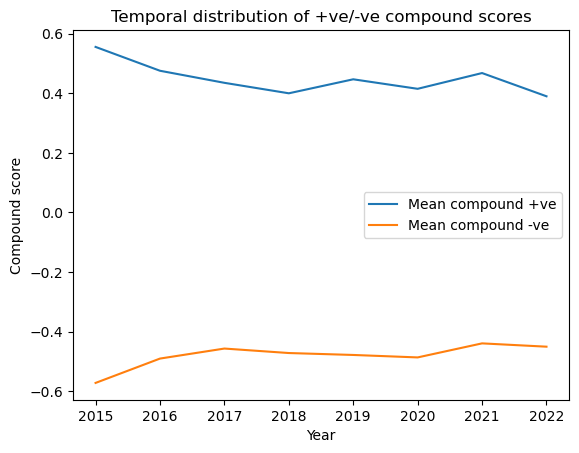

In [191]:
YR = np.linspace(2015, 2022, 2022-2015+1)
pos = []
neg = []
neut = []
mean_pos = []
mean_neg = []
for yr in range (2014, 2022):
    dummy = df[df['Year']==yr]
    positive_tweets = dummy[dummy['Compound'] > 0]
    negative_tweets = dummy[dummy['Compound'] < 0]
    neutral_tweets = dummy[dummy['Compound'] == 0]
    pos.append(len(positive_tweets)/len(dummy))
    neg.append(len(negative_tweets)/len(dummy))
    neut.append(len(neutral_tweets)/len(dummy))
    mean_pos.append(np.mean(positive_tweets['Compound']))
    mean_neg.append(np.mean(negative_tweets['Compound']))

import matplotlib.pyplot as plt
plt.plot(YR, mean_pos, label = 'Mean compound +ve')
plt.plot(YR, mean_neg, label = 'Mean compound -ve')
plt.xlabel('Year')
plt.ylabel('Compound score')
plt.title('Temporal distribution of +ve/-ve compound scores')
plt.legend()

In [204]:
for i in range (len(mean_pos)):
    print (np.round((mean_pos[i]-mean_neg[i]),3))

1.128
0.966
0.892
0.872
0.925
0.902
0.907
0.84


In [197]:
mean_neg

[-0.5720571428571428,
 -0.4903366666666667,
 -0.4567071428571429,
 -0.47174243902439006,
 -0.4782028225806453,
 -0.4864687499999997,
 -0.43932175572519094,
 -0.4504299465240642]

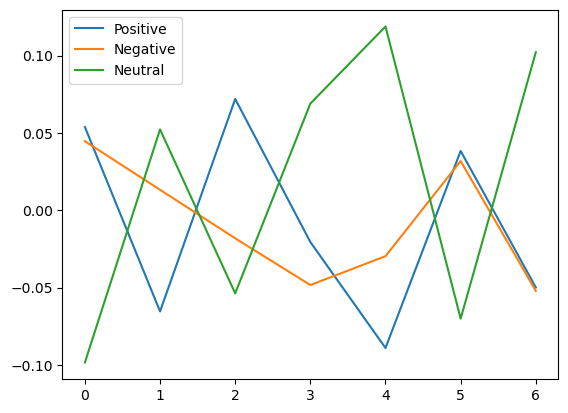

In [176]:
delta_pos = np.diff(pos)
delta_neg = np.diff(neg)
delta_neut = np.diff(neut)
plt.plot(delta_pos, label = 'Positive')
plt.plot(delta_neg, label = 'Negative')
plt.plot(delta_neut, label = 'Neutral')

plt.legend()


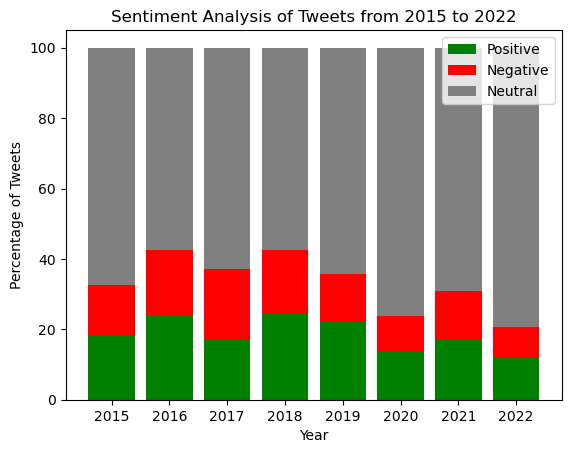

In [177]:
import matplotlib.pyplot as plt

# Example data
year = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
pos_pct =np.array(pos)*100 # Percentage of positive tweets
neg_pct =np.array(neg)*100 # Percentage of negative tweets
neu_pct =np.array(neut)*100 # Percentage of neutral tweets

# Create a stacked bar chart
fig, ax = plt.subplots()
ax.bar(year, pos_pct, label='Positive', color='green')
ax.bar(year, neg_pct, bottom=pos_pct, label='Negative', color='red')
ax.bar(year, neu_pct, bottom=[pos_pct[j] + neg_pct[j] for j in range(len(pos_pct))], label='Neutral', color='gray')

# Add labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Tweets')
ax.set_title('Sentiment Analysis of Tweets from 2015 to 2022')
ax.legend()

plt.show()

In [181]:
neut

[0.673469387755102,
 0.575,
 0.6272401433691757,
 0.5734639358860196,
 0.6424127671084663,
 0.7612352498116998,
 0.6911076443057722,
 0.7932584269662921]

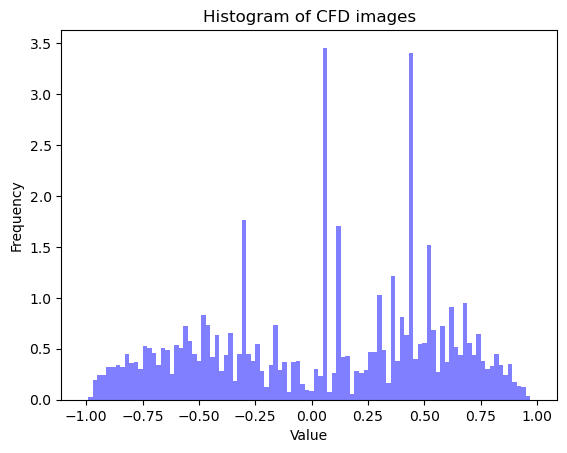

In [136]:
hist_a, bin_edges = np.histogram(dummy['Compound'], bins=100, range=(-1,1), density=True)
plt.bar(bin_edges[:-1], hist_a, width=bin_edges[1]-bin_edges[0], color='blue', alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of CFD images')
plt.show()

Cluster 0: 15519 samples
Cluster 1: 5 samples
Cluster 2: 17 samples
Cluster 3: 9 samples


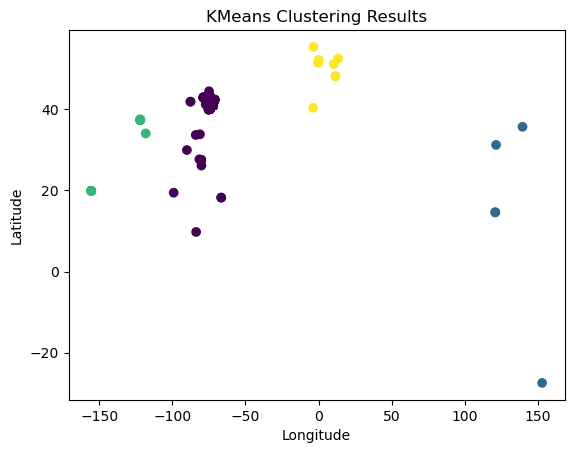

In [39]:
from sklearn.cluster import KMeans
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)
data = df[['latitude', 'longitude']].values
kmeans.fit(data)
df['cluster'] = kmeans.labels_

for i in range(num_clusters):
    num_samples = np.sum(df['cluster'] == i)
    print(f"Cluster {i}: {num_samples} samples")

import matplotlib.pyplot as plt
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('KMeans Clustering Results')
plt.show()

In [154]:
def get_date(date):
    date_time_str = date
    date_time_obj = datetime.strptime(date_time_str[:19], '%Y-%m-%d %H:%M:%S')
    date_obj = date_time_obj.date()
    date_output = str(date_obj.year)+'-'+str(date_obj.month)+'-'+str(date_obj.day)
    return date_obj.year

In [116]:
df['Date'] = df['Tweet Date'].apply(get_date)
df['Date'].unique()

array(['2010-10-15', '2010-10-14', '2010-6-23', ..., '2023-1-3',
       '2023-1-2', '2023-1-1'], dtype=object)

In [118]:
start_date = '2022-06-08'
end_date = '2023-1-2'

filtered_df = df.loc[start_date:end_date]
filtered_df.head()

,Unnamed: 0,Unnamed: 0.1,Tweet,User Location,User Description,User Follower Count,Tweet Date,Relevence,Negative,Neutral,Positive,Compound,latitude,longitude,Date
2023,2023,521,#SoupKitchenSammy regrets filling his belly be...,"Queens, NYC",New Media Artist / Musician / Freestyle Roller...,169,2018-12-04 23:43:30+00:00,3,0.128,0.872,0.0,-0.3612,40.728224,-73.794852,2018-12-4


In [108]:
# import requests
# res = requests.get("https://api.open-meteo.com/v1/forecast?latitude=40.712775&longitude=-74.005973&daily=temperature_2m_max,temperature_2m_min,precipitation_sum&forecast_days=1&start_date=2022-11-20&end_date=2022-11-20&timezone=America%2FNew_York")

# res = res.json()


In [44]:
import requests
import pandas as pd


# Define the base URL for the API
base_url = "https://api.open-meteo.com/v1/forecast"

# Define the columns you want to fetch
columns = "t_2m:C,precip_1h:mm"

# Define a function to fetch weather data for a particular location and date
def get_weather_data(lat, lon, date):
    date_time_str = date
    date_time_obj = datetime.strptime(date_time_str[:19], '%Y-%m-%d %H:%M:%S+%f')
    date_obj = date_time_obj.date()
    start_date = str(date_obj.year)+'-'+str(date_obj.month)+'-'+str(date_obj.day)
    end_date = start_date
    url = f"{base_url}?latitude={lat}&longitude={lon}&daily=temperature_2m_max,temperature_2m_min,precipitation_sum&forecast_days=1&start_date={start_date}&end_date={end_date}&timezone=America%2FNew_York"
    response = requests.get(url)
    data = response.json()
    temp_max = res['daily']['temperature_2m_max'][0]
    temp_min = res['daily']['temperature_2m_min'][0]
    precip = res['daily']['precipitation_sum'][0]
    return temp_max, temp_min, precip

# Load your data into a pandas dataframe
df = pd.read_csv("your_data.csv")

# Apply the get_weather_data function to each row in the dataframe and store the results in new columns
df[["temperature", "precipitation"]] = df.apply(lambda row: pd.Series(get_weather_data(row["latitude"], row["longitude"], row["date"])), axis=1)

# Print the updated dataframe
print(df.head())


b'{"latitude":52.5,"longitude":13.400009,"generationtime_ms":0.32198429107666016,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":38.0,"hourly_units":{"time":"iso8601","temperature_2m":"\xc2\xb0C"},"hourly":{"time":["2021-01-01T00:00","2021-01-01T01:00","2021-01-01T02:00","2021-01-01T03:00","2021-01-01T04:00","2021-01-01T05:00","2021-01-01T06:00","2021-01-01T07:00","2021-01-01T08:00","2021-01-01T09:00","2021-01-01T10:00","2021-01-01T11:00","2021-01-01T12:00","2021-01-01T13:00","2021-01-01T14:00","2021-01-01T15:00","2021-01-01T16:00","2021-01-01T17:00","2021-01-01T18:00","2021-01-01T19:00","2021-01-01T20:00","2021-01-01T21:00","2021-01-01T22:00","2021-01-01T23:00","2021-01-02T00:00","2021-01-02T01:00","2021-01-02T02:00","2021-01-02T03:00","2021-01-02T04:00","2021-01-02T05:00","2021-01-02T06:00","2021-01-02T07:00","2021-01-02T08:00","2021-01-02T09:00","2021-01-02T10:00","2021-01-02T11:00","2021-01-02T12:00","2021-01-02T13:00","2021-01-02T14:00","2021-01-0

In [101]:
def get_weather_data(lat, lon, date):
    base_url = "https://api.open-meteo.com/v1/forecast"
    date_time_str = date
    date_time_obj = datetime.strptime(date_time_str[:19], '%Y-%m-%d %H:%M:%S')
    date_obj = date_time_obj.date()
    start_date = str(date_obj.year)+'-'+str(date_obj.month)+'-'+str(date_obj.day)
    end_date = start_date
    url = f"{base_url}?latitude={lat}&longitude={lon}&daily=temperature_2m_max,temperature_2m_min,precipitation_sum&forecast_days=1&start_date={start_date}&end_date={end_date}&timezone=America%2FNew_York"
    response = requests.get(url)
    data = response.json()
    temp_max = res['daily']['temperature_2m_max'][0]
    temp_min = res['daily']['temperature_2m_min'][0]
    precip = res['daily']['precipitation_sum'][0]
    return temp_max, temp_min, precip

In [110]:
print (get_weather_data(40.712775, -74.005973, '2021-11-20 21:25:55+00:00'))

(2.6, -2.8, 0.0)
